# Driver code

In [ ]:
# !pip install -U ipympl

In [138]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Raw_Data.bulk_and_open_system_model import get_plots_geometries, get_plots_3d
from sklearn.model_selection import train_test_split
import auxiliary_funcs as aux
from tqdm import tqdm
plt.rcParams["text.usetex"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting geometries plots

In [2]:
# Constants
flat_band_on_off = 0
N_band = 2
N = 1
alfa = 0.6
Nx = 24
Ny = Nx
X, Y = np.meshgrid(np.arange(0, Nx, 1), np.arange(0, Ny, 1))
hopping_range = 4
dk = 0.1
kx_vec = np.arange(-np.pi, np.pi, dk)

**Figure 2.1**

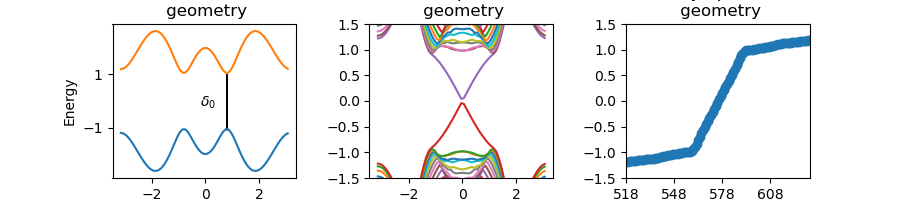

In [3]:
# mu and line_len can be modified to get figures from the tutorial
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Figure 2.2**

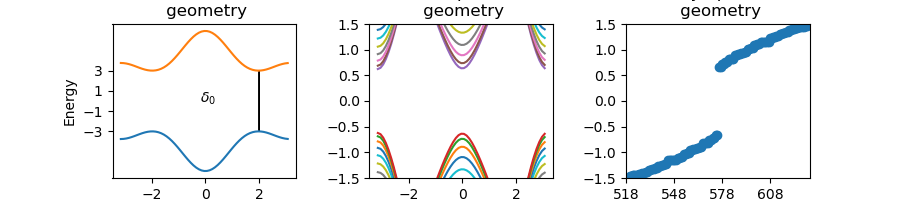

In [4]:
# mu and line_len can be modified to get figures from the tutorial
mu = 3
line_len = [2, -3, 0, 6]
parameters = np.array([N, mu, alfa, flat_band_on_off])
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Plot 3**

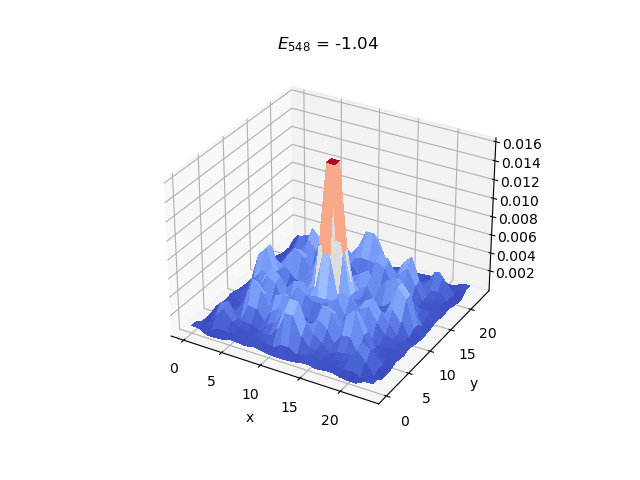

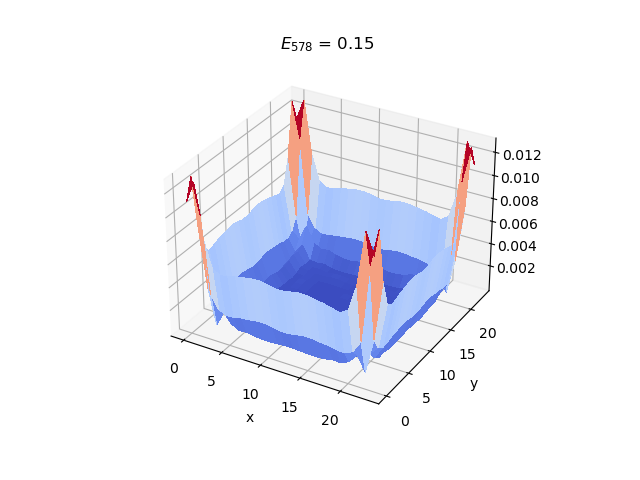

In [5]:
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
get_plots_3d(Nx, Ny, hopping_range, parameters, X, Y)

## Getting data from Pandas and EDA

Reading data saved prevously

In [6]:
output = pd.read_pickle("Raw_Data/pandas_data_set_Shiba_data.pkl")

In [7]:
output.shape

(85570, 13)

We print first 20 rows of the DataFrame to get a sense of what can we encounter there

In [8]:
output.head(20)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,1.0,1.0,0.1,3.667,0.644,2.1947,0.0,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,24.0,1.0,2.0,0.1,3.667,0.644,2.1947,0.1,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,24.0,1.0,3.0,0.1,3.667,0.644,2.1947,0.2,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,4.0,0.1,3.667,0.644,2.1947,0.3,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,24.0,1.0,5.0,0.1,3.667,0.644,2.1947,0.4,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,24.0,1.0,6.0,0.1,3.667,0.644,2.1947,0.5,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,24.0,1.0,7.0,0.1,3.667,0.644,2.1947,0.6,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,24.0,1.0,8.0,0.1,3.667,0.644,2.1947,0.7,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,24.0,1.0,9.0,0.1,3.667,0.644,2.1947,0.8,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,24.0,1.0,10.0,0.1,3.667,0.644,2.1947,0.9,0.0,0.0,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


We can see that even though the bulk chern marker groups have even counts, their dispersions are not even. Group with bulk chern marker 2 is much more dispersed than the other three. We may have slight suspisions that it might be the hardest to spot for the NN later on.

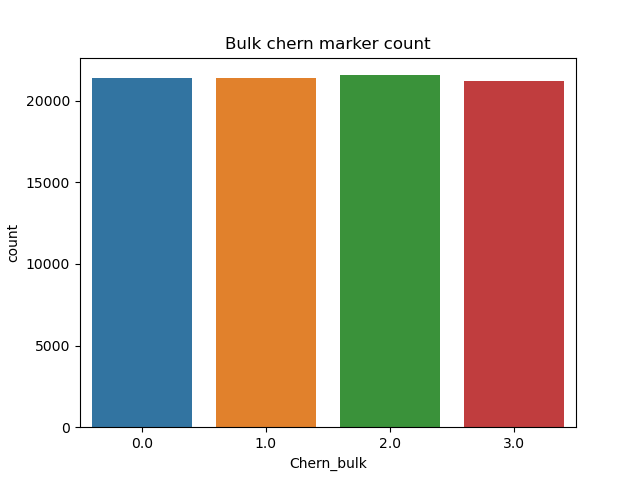

In [9]:
plt.figure()
plt.title("Bulk chern marker count")
sns.countplot(x=output["Chern_bulk"])
plt.show()

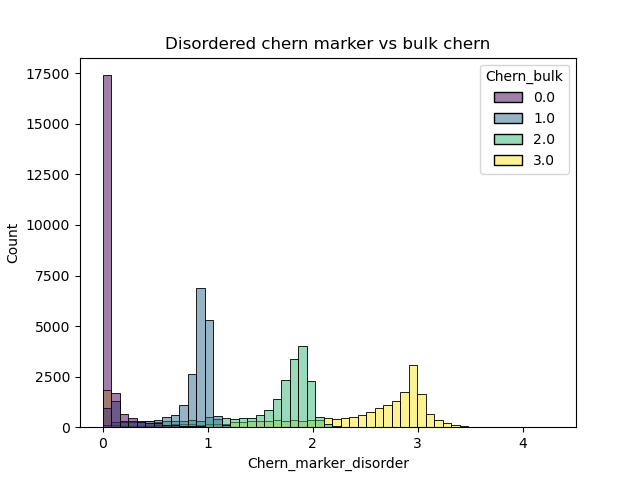

In [10]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern")
sns.histplot(output, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()


We set *train* and *test* data sets by train-test-split from sklearn's model selection module with shuffle option enabled
*test* dataset size will be 20% of the raw dataset. Train dataset will be further processed for fine-tuning the model, while the test dataset will be left as is.

In [11]:
test_proc = 0.1
X_train, X_test = train_test_split(output, test_size=test_proc, shuffle=True, stratify=output["Chern_bulk"])
print("Shape of the raw data is ", output.shape)
print("Shape of the train data is ", X_train.shape, ", and of the test data ", X_test.shape)

Shape of the raw data is  (85570, 13)
Shape of the train data is  (77013, 13) , and of the test data  (8557, 13)


Now we would like to make our train data linearly separable for the NN, so we transfrom them the way to eliminate the overlaps seen on the plot above

Here we can see that after first step of normalization (setting $V_0 < 1$) we already went down from $68456$ samples to $\sim 32600$ samples (exact number varies due to shuffling done during split)

In [12]:
X_train = X_train.loc[X_train["v_sample"] < 1]
X_train.reset_index(drop=True, inplace=True)
X_train.shape

(36635, 13)

In [13]:
X_train.head(5)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,1.0,81910.0,0.1,1.000,0.723,1.7758,0.9,2.0,1.935,1.840,14.0,"[0.002474639847696685, 0.002941120291643249, 0..."
1,24.0,3.0,73378.0,0.1,2.000,0.169,1.3000,0.3,3.0,2.938,2.900,8.0,"[0.0040881542271925765, 0.0062225384866075725,..."
2,24.0,1.0,37472.0,0.1,4.000,0.525,3.8069,0.7,0.0,0.000,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,15401.0,0.1,-4.000,0.248,0.1824,0.7,1.0,0.089,0.087,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,24.0,3.0,3340.0,0.1,1.667,0.367,0.4208,0.0,0.0,0.026,0.026,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Now let's apply second normalization condition, that is $|C - C_m| < 0.5$

In [14]:
X_train["|C-C_m|"] = X_train["Chern_bulk"] - X_train["Chern_marker_disorder"]

In [15]:
X_train.head(30)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS,|C-C_m|
0,24.0,1.0,81910.0,0.1,1.000,0.723,1.7758,0.9,2.0,1.935,1.840,14.0,"[0.002474639847696685, 0.002941120291643249, 0...",0.160
1,24.0,3.0,73378.0,0.1,2.000,0.169,1.3000,0.3,3.0,2.938,2.900,8.0,"[0.0040881542271925765, 0.0062225384866075725,...",0.100
2,24.0,1.0,37472.0,0.1,4.000,0.525,3.8069,0.7,0.0,0.000,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.001
3,24.0,1.0,15401.0,0.1,-4.000,0.248,0.1824,0.7,1.0,0.089,0.087,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.913
4,24.0,3.0,3340.0,0.1,1.667,0.367,0.4208,0.0,0.0,0.026,0.026,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.026
5,24.0,1.0,33526.0,0.1,-1.667,0.723,0.2333,0.9,2.0,1.318,1.343,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.657
6,24.0,3.0,81721.0,0.1,-0.667,0.327,1.9279,0.9,3.0,2.979,3.071,20.0,"[0.003364822326996226, 0.018600395155035664, 0...",-0.071
7,24.0,1.0,64473.0,0.1,3.333,0.604,1.8445,0.2,0.0,0.000,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000
8,24.0,1.0,43184.0,0.1,-2.000,0.287,1.9541,0.7,1.0,0.962,0.972,8.0,"[0.06230393916584765, 0.007456304178153545, 0....",0.028
9,24.0,1.0,10025.0,0.1,0.333,0.960,2.0023,0.7,2.0,1.796,1.967,14.0,"[0.011040516701082085, 0.0036383872703661924, ...",0.033


In [16]:
X_train = X_train.loc[X_train["|C-C_m|"] < 0.5]
X_train.reset_index(drop=True, inplace=True)
X_train.shape

(32471, 14)

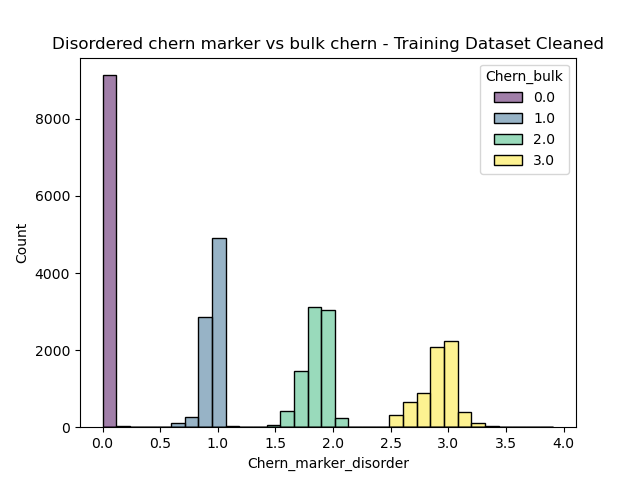

In [17]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern - Training Dataset Cleaned")
sns.histplot(X_train, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()

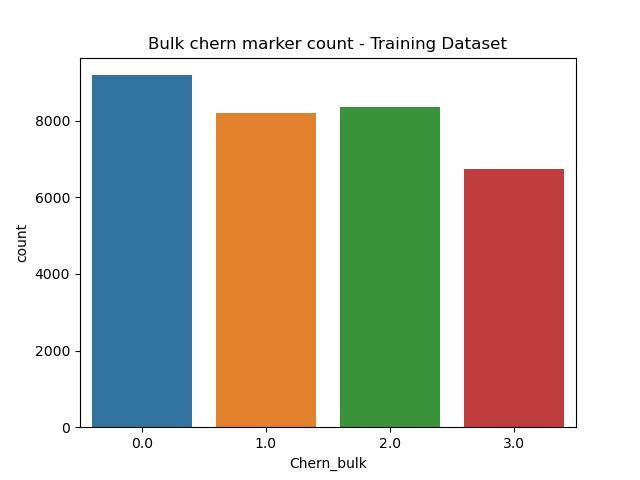

In [18]:
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
plt.figure()
plt.title("Bulk chern marker count - Training Dataset")
sns.countplot(x=X_train["Chern_bulk"])
plt.show()

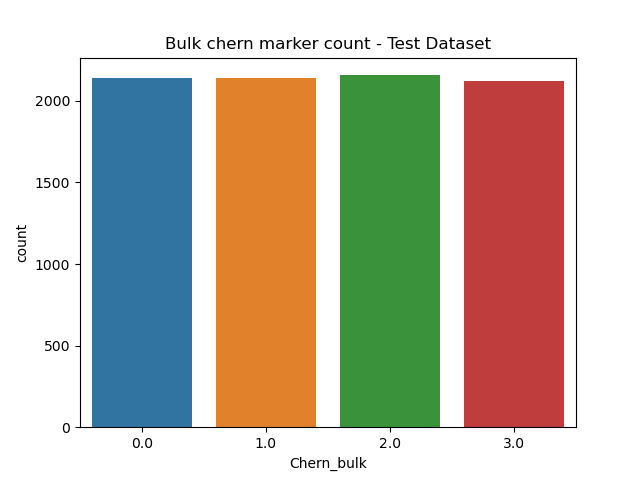

In [19]:
plt.figure()
plt.title("Bulk chern marker count - Test Dataset")
sns.countplot(x=X_test["Chern_bulk"])
plt.show()

After all the steps of data cleaning we are good to split it into *training dataset* and the *validation dataset* we will use to train our CNN. But first we need to drop all the unnecessary columns in both Training and Test dataset, as our CNN will be learning to recognise images (24x24 matrices) of LDOS, with *one-hot-encoded* Bulk Chern Numbers $|C_n|$ as labels.

**NOTE**
    If possible rerun the raw data genration for lattice 34x34, and 10 000 samples. To be seen. I.E. How big of a system would you need to get Chern 4, or 5

In [20]:
X_train = X_train.loc[:, ["LDOS","Chern_bulk"]]
X_test = X_test.loc[:, ["LDOS","Chern_bulk"]]

In [21]:
X_train.head(12)

,LDOS,Chern_bulk
0,"[0.002474639847696685, 0.002941120291643249, 0...",2.0
1,"[0.0040881542271925765, 0.0062225384866075725,...",3.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
4,"[0.003364822326996226, 0.018600395155035664, 0...",3.0
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
6,"[0.06230393916584765, 0.007456304178153545, 0....",1.0
7,"[0.011040516701082085, 0.0036383872703661924, ...",2.0
8,"[0.019832513764793766, 0.0035823093418684265, ...",2.0
9,"[0.041349670631705644, 0.009429801483382565, 0...",1.0


When we print out the first element, we see that it has desired length, as $24\cdot24 = 576$

In [22]:
X_train.iloc[0]["LDOS"].shape

(576,)

We can interpret these matrices as images, like the ones pictured below

Add second row with V_0 = 0. To this plots add disroder >1. Then $C_M$ =0 can giv ebulk states. Look for this, and maybe extract the data for reproducibility of figures

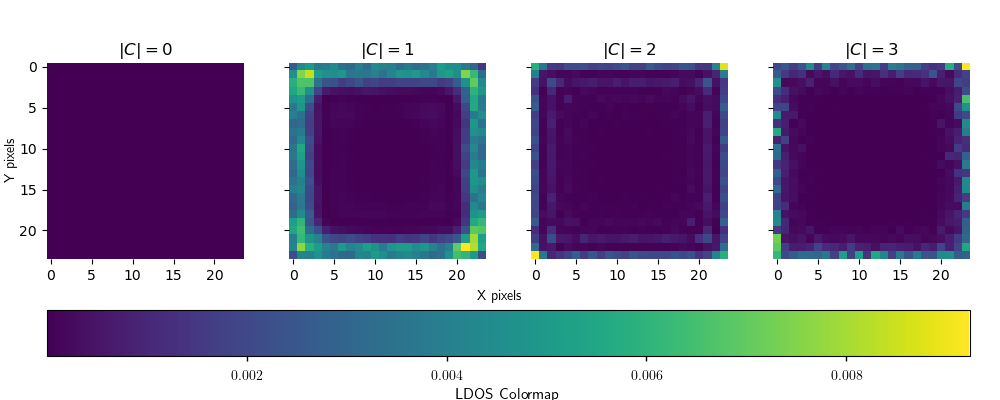

In [23]:
aux.get_figure_repr_1(X_train)

We can now clean the test data from the unnecesary columns, and split it in data and labels

In [24]:
X_test, Y_test = X_test["LDOS"], X_test["Chern_bulk"]
X_train, X_val, Y_train, Y_val = train_test_split(X_train["LDOS"], X_train["Chern_bulk"], test_size=0.2, shuffle=True, stratify=X_train["Chern_bulk"])

Now we can split the training data into real training dataset and validation dataset, along with splitting the labels

We can check dimensionality just in case

In [25]:
print("Shapes of X_train data: {}, Y_train labels: {}".format(X_train.shape, Y_train.shape))
print("Shapes of X_val data: {}, Y_val labels: {}".format(X_val.shape, Y_val.shape))
print("Shapes of X_test data: {}, Y_test labels: {}".format(X_test.shape, Y_test.shape))

Shapes of X_train data: (25976,), Y_train labels: (25976,)
Shapes of X_val data: (6495,), Y_val labels: (6495,)
Shapes of X_test data: (8557,), Y_test labels: (8557,)


Now let's normalize the data

In [26]:
X_train

28897    [0.025580258938465394, 0.012272901098666597, 0...
3631     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19559    [0.018780591660209345, 0.006308163668295616, 0...
26137    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
26804    [0.002572361426272083, 0.020699263828746508, 0...
                               ...                        
17292    [0.007508627529982719, 0.012560499768556265, 0...
2515     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
30087    [0.00657636515207271, 0.014748906103095318, 0....
9989     [0.010627826858040491, 0.010277776617094515, 0...
23475    [0.00303977015309364, 0.005423168628514985, 0....
Name: LDOS, Length: 25976, dtype: object

LDOS Normalization

In [27]:
for i in range(X_train.shape[0]):
    mean = np.mean(X_train.iloc[i])
    maximum = np.max(X_train.iloc[i])
    std = np.std(X_train.iloc[i])
    if mean > 0:
        X_train.iloc[i] = X_train.iloc[i] / std

In [28]:
for i in range(X_val.shape[0]):
    mean = np.mean(X_val.iloc[i])
    maximum = np.max(X_val.iloc[i])
    std = np.std(X_val.iloc[i])
    if mean > 0:
        X_val.iloc[i] = X_val.iloc[i] / std

In [29]:
for i in range(X_test.shape[0]):
    mean = np.mean(X_test.iloc[i])
    maximum = np.max(X_test.iloc[i])
    std = np.std(X_test.iloc[i])
    if mean > 0:
        X_test.iloc[i] = X_test.iloc[i] / std

In [30]:
X_train = X_train.to_list()
X_val = X_val.to_list()
X_test = X_test.to_list()

Retrain the models

In [31]:
X_train = tf.convert_to_tensor(X_train)
X_val = tf.convert_to_tensor(X_val)
X_test = tf.convert_to_tensor(X_test)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-08 00:21:25.058134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-08 00:21:25.058656: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
X_train = tf.reshape(X_train, [-1, 24,24, 1])
X_val = tf.reshape(X_val, [-1, 24,24, 1])
X_test = tf.reshape(X_test, [-1, 24,24, 1])

In [33]:
Y_train = tf.cast(Y_train, "int32")
Y_val = tf.cast(Y_val, "int32")
Y_test = tf.cast(Y_test, "int32")

In [34]:
depth = 4

Y_train = tf.one_hot(Y_train, depth)
Y_val = tf.one_hot(Y_val, depth)
Y_test = tf.one_hot(Y_test, depth)

And **NOW** we can get into creating and training a CNN model

In [35]:
Y_train

<tf.Tensor: shape=(25976, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

## Setting up a CNN model

In [36]:
def getModelA(
    nFilters,
    nNeurons,
    dropout_rate,
    inputShape,
    outputWidth,
    ):
    
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    # x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(nNeurons, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(nNeurons//2, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']
    )
    return model

In [37]:
def getModelB(
    nFilters,
    kernel_size,
    pool_size,
    dropout_rate,
    inputShape,
    outputWidth,
    ):
    
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    # x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    x = tf.keras.layers.Conv2D(nFilters, kernel_size=kernel_size, strides=(1,1), activation=tf.nn.relu, padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=(2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']
    )
    return model

In [38]:
def getModelC(
    nFilters,
    kernel_size,
    pool_size,
    nHiddenLayers,
    dropout_rate,
    inputShape,
    outputWidth,
    ):
    
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    # x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    for iHidden in range(nHiddenLayers):   
        x = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=kernel_size, activation=tf.nn.relu)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=2)(x)
        x = tf.keras.layers.Conv2D(filters=nFilters//2, kernel_size=kernel_size, activation=tf.nn.relu)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']
    )
    return model

In [150]:
verb=0
dropout_rate = 0.5
l2_lambda = 0.001
epochs = 100
batch_size = 256
nFilters = 64
kernel_size = (3,3)
pool_size = (2,2)
nNeurons = 256
nHiddenLayers = 1
inputShape = (24, 24, 1)
outputWidth = 4
noRuns = 10
labels = ["$|C_m| = 0$", "$|C_m| = 1$", "$|C_m| = 2$", "$|C_m| = 3$"]
labels_no_tex = ["|C_m| = 0", "|C_m| = 1", "|C_m| = 2", "|C_m| = 3"]

filepath = "Models/Model_A.ckpt"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
    mode="max",
)

In [118]:
%%time

model_A_tab = []
model_A_hist_tab = []

for run in tqdm(range(noRuns), desc="Loading..."):
    model_A = getModelA(nFilters, nNeurons, dropout_rate, inputShape, outputWidth)

    model_A_fit = model_A.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=verb, use_multiprocessing=True, callbacks=[checkpoint])

    model_A_tab.append(model_A)
    model_A_hist_tab.append(model_A_fit)

2022-04-08 02:46:16.012703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:46:17.198902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy improved from -inf to 0.88730, saving model to Models/Model_A.ckpt

Epoch 00002: val_accuracy improved from 0.88730 to 0.92086, saving model to Models/Model_A.ckpt

Epoch 00003: val_accuracy did not improve from 0.92086

Epoch 00004: val_accuracy improved from 0.92086 to 0.93426, saving model to Models/Model_A.ckpt

Epoch 00005: val_accuracy improved from 0.93426 to 0.94288, saving model to Models/Model_A.ckpt

Epoch 00006: val_accuracy improved from 0.94288 to 0.94365, saving model to Models/Model_A.ckpt

Epoch 00007: val_accuracy improved from 0.94365 to 0.95135, saving model to Models/Model_A.ckpt

Epoch 00008: val_accuracy did not improve from 0.95135

Epoch 00009: val_accuracy improved from 0.95135 to 0.95396, saving model to Models/Model_A.ckpt

Epoch 00010: val_accuracy did not improve from 0.95396

Epoch 00011: val_accuracy did not improve from 0.95396

Epoch 00012: val_accuracy improved from 0.95396 to 0.95797, saving model to Models/Model_A.ckpt

Ep

2022-04-08 02:47:38.004609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:47:38.762486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96320

Epoch 00002: val_accuracy did not improve from 0.96320

Epoch 00003: val_accuracy did not improve from 0.96320

Epoch 00004: val_accuracy did not improve from 0.96320

Epoch 00005: val_accuracy did not improve from 0.96320

Epoch 00006: val_accuracy did not improve from 0.96320

Epoch 00007: val_accuracy did not improve from 0.96320

Epoch 00008: val_accuracy did not improve from 0.96320

Epoch 00009: val_accuracy did not improve from 0.96320

Epoch 00010: val_accuracy did not improve from 0.96320

Epoch 00011: val_accuracy did not improve from 0.96320

Epoch 00012: val_accuracy did not improve from 0.96320

Epoch 00013: val_accuracy did not improve from 0.96320

Epoch 00014: val_accuracy did not improve from 0.96320

Epoch 00015: val_accuracy did not improve from 0.96320

Epoch 00016: val_accuracy did not improve from 0.96320

Epoch 00017: val_accuracy did not improve from 0.96320

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:48:57.916141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:48:58.695942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96336

Epoch 00002: val_accuracy did not improve from 0.96336

Epoch 00003: val_accuracy did not improve from 0.96336

Epoch 00004: val_accuracy did not improve from 0.96336

Epoch 00005: val_accuracy did not improve from 0.96336

Epoch 00006: val_accuracy did not improve from 0.96336

Epoch 00007: val_accuracy did not improve from 0.96336

Epoch 00008: val_accuracy did not improve from 0.96336

Epoch 00009: val_accuracy did not improve from 0.96336

Epoch 00010: val_accuracy did not improve from 0.96336

Epoch 00011: val_accuracy did not improve from 0.96336

Epoch 00012: val_accuracy did not improve from 0.96336

Epoch 00013: val_accuracy did not improve from 0.96336

Epoch 00014: val_accuracy did not improve from 0.96336

Epoch 00015: val_accuracy did not improve from 0.96336

Epoch 00016: val_accuracy did not improve from 0.96336

Epoch 00017: val_accuracy did not improve from 0.96336

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:50:15.371326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:50:16.119069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96413

Epoch 00002: val_accuracy did not improve from 0.96413

Epoch 00003: val_accuracy did not improve from 0.96413

Epoch 00004: val_accuracy did not improve from 0.96413

Epoch 00005: val_accuracy did not improve from 0.96413

Epoch 00006: val_accuracy did not improve from 0.96413

Epoch 00007: val_accuracy did not improve from 0.96413

Epoch 00008: val_accuracy did not improve from 0.96413

Epoch 00009: val_accuracy did not improve from 0.96413

Epoch 00010: val_accuracy did not improve from 0.96413

Epoch 00011: val_accuracy did not improve from 0.96413

Epoch 00012: val_accuracy did not improve from 0.96413

Epoch 00013: val_accuracy did not improve from 0.96413

Epoch 00014: val_accuracy did not improve from 0.96413

Epoch 00015: val_accuracy did not improve from 0.96413

Epoch 00016: val_accuracy did not improve from 0.96413

Epoch 00017: val_accuracy did not improve from 0.96413

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:51:33.965734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:51:34.815679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96413

Epoch 00002: val_accuracy did not improve from 0.96413

Epoch 00003: val_accuracy did not improve from 0.96413

Epoch 00004: val_accuracy did not improve from 0.96413

Epoch 00005: val_accuracy did not improve from 0.96413

Epoch 00006: val_accuracy did not improve from 0.96413

Epoch 00007: val_accuracy did not improve from 0.96413

Epoch 00008: val_accuracy did not improve from 0.96413

Epoch 00009: val_accuracy did not improve from 0.96413

Epoch 00010: val_accuracy did not improve from 0.96413

Epoch 00011: val_accuracy did not improve from 0.96413

Epoch 00012: val_accuracy did not improve from 0.96413

Epoch 00013: val_accuracy did not improve from 0.96413

Epoch 00014: val_accuracy did not improve from 0.96413

Epoch 00015: val_accuracy did not improve from 0.96413

Epoch 00016: val_accuracy did not improve from 0.96413

Epoch 00017: val_accuracy did not improve from 0.96413

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:52:53.450701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:52:54.272157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96459

Epoch 00002: val_accuracy did not improve from 0.96459

Epoch 00003: val_accuracy did not improve from 0.96459

Epoch 00004: val_accuracy did not improve from 0.96459

Epoch 00005: val_accuracy did not improve from 0.96459

Epoch 00006: val_accuracy did not improve from 0.96459

Epoch 00007: val_accuracy did not improve from 0.96459

Epoch 00008: val_accuracy did not improve from 0.96459

Epoch 00009: val_accuracy did not improve from 0.96459

Epoch 00010: val_accuracy did not improve from 0.96459

Epoch 00011: val_accuracy did not improve from 0.96459

Epoch 00012: val_accuracy did not improve from 0.96459

Epoch 00013: val_accuracy did not improve from 0.96459

Epoch 00014: val_accuracy did not improve from 0.96459

Epoch 00015: val_accuracy did not improve from 0.96459

Epoch 00016: val_accuracy did not improve from 0.96459

Epoch 00017: val_accuracy did not improve from 0.96459

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:54:13.317854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:54:14.210056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96459

Epoch 00002: val_accuracy did not improve from 0.96459

Epoch 00003: val_accuracy did not improve from 0.96459

Epoch 00004: val_accuracy did not improve from 0.96459

Epoch 00005: val_accuracy did not improve from 0.96459

Epoch 00006: val_accuracy did not improve from 0.96459

Epoch 00007: val_accuracy did not improve from 0.96459

Epoch 00008: val_accuracy did not improve from 0.96459

Epoch 00009: val_accuracy did not improve from 0.96459

Epoch 00010: val_accuracy did not improve from 0.96459

Epoch 00011: val_accuracy did not improve from 0.96459

Epoch 00012: val_accuracy did not improve from 0.96459

Epoch 00013: val_accuracy did not improve from 0.96459

Epoch 00014: val_accuracy did not improve from 0.96459

Epoch 00015: val_accuracy did not improve from 0.96459

Epoch 00016: val_accuracy did not improve from 0.96459

Epoch 00017: val_accuracy did not improve from 0.96459

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:55:36.610474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:55:37.442377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96459

Epoch 00002: val_accuracy did not improve from 0.96459

Epoch 00003: val_accuracy did not improve from 0.96459

Epoch 00004: val_accuracy did not improve from 0.96459

Epoch 00005: val_accuracy did not improve from 0.96459

Epoch 00006: val_accuracy did not improve from 0.96459

Epoch 00007: val_accuracy did not improve from 0.96459

Epoch 00008: val_accuracy did not improve from 0.96459

Epoch 00009: val_accuracy did not improve from 0.96459

Epoch 00010: val_accuracy did not improve from 0.96459

Epoch 00011: val_accuracy did not improve from 0.96459

Epoch 00012: val_accuracy did not improve from 0.96459

Epoch 00013: val_accuracy did not improve from 0.96459

Epoch 00014: val_accuracy did not improve from 0.96459

Epoch 00015: val_accuracy did not improve from 0.96459

Epoch 00016: val_accuracy did not improve from 0.96459

Epoch 00017: val_accuracy did not improve from 0.96459

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:56:55.397064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:56:56.180389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96459

Epoch 00002: val_accuracy did not improve from 0.96459

Epoch 00003: val_accuracy did not improve from 0.96459

Epoch 00004: val_accuracy did not improve from 0.96459

Epoch 00005: val_accuracy did not improve from 0.96459

Epoch 00006: val_accuracy did not improve from 0.96459

Epoch 00007: val_accuracy did not improve from 0.96459

Epoch 00008: val_accuracy did not improve from 0.96459

Epoch 00009: val_accuracy did not improve from 0.96459

Epoch 00010: val_accuracy did not improve from 0.96459

Epoch 00011: val_accuracy did not improve from 0.96459

Epoch 00012: val_accuracy did not improve from 0.96459

Epoch 00013: val_accuracy did not improve from 0.96459

Epoch 00014: val_accuracy did not improve from 0.96459

Epoch 00015: val_accuracy did not improve from 0.96459

Epoch 00016: val_accuracy did not improve from 0.96459

Epoch 00017: val_accuracy did not improve from 0.96459

Epoch 00018: val_accuracy did not improve from 

2022-04-08 02:58:16.925372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:58:17.795679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96520

Epoch 00002: val_accuracy did not improve from 0.96520

Epoch 00003: val_accuracy did not improve from 0.96520

Epoch 00004: val_accuracy did not improve from 0.96520

Epoch 00005: val_accuracy did not improve from 0.96520

Epoch 00006: val_accuracy did not improve from 0.96520

Epoch 00007: val_accuracy did not improve from 0.96520

Epoch 00008: val_accuracy did not improve from 0.96520

Epoch 00009: val_accuracy did not improve from 0.96520

Epoch 00010: val_accuracy did not improve from 0.96520

Epoch 00011: val_accuracy did not improve from 0.96520

Epoch 00012: val_accuracy did not improve from 0.96520

Epoch 00013: val_accuracy did not improve from 0.96520

Epoch 00014: val_accuracy did not improve from 0.96520

Epoch 00015: val_accuracy did not improve from 0.96520

Epoch 00016: val_accuracy did not improve from 0.96520

Epoch 00017: val_accuracy did not improve from 0.96520

Epoch 00018: val_accuracy did not improve from 

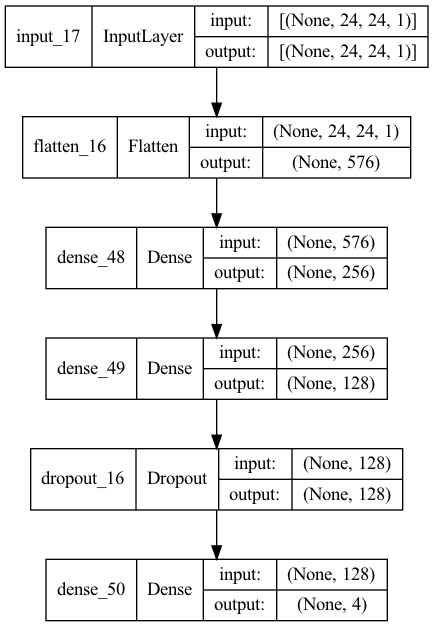

In [119]:
model_A.load_weights(filepath)
# model_A.summary()
tf.keras.utils.plot_model(model_A, 'ML_model_A.png', show_shapes=True)

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2141
           1       0.95      0.58      0.72      2138
           2       0.65      0.64      0.65      2157
           3       0.89      0.52      0.65      2121

    accuracy                           0.68      8557
   macro avg       0.76      0.68      0.68      8557
weighted avg       0.76      0.68      0.68      8557

[[2133    4    3    1]
 [ 501 1242  347   48]
 [ 633   55 1382   87]
 [ 628   12  386 1095]]
54.76251604621309
94.5925361766946
65.25023607176583
88.95207148659627


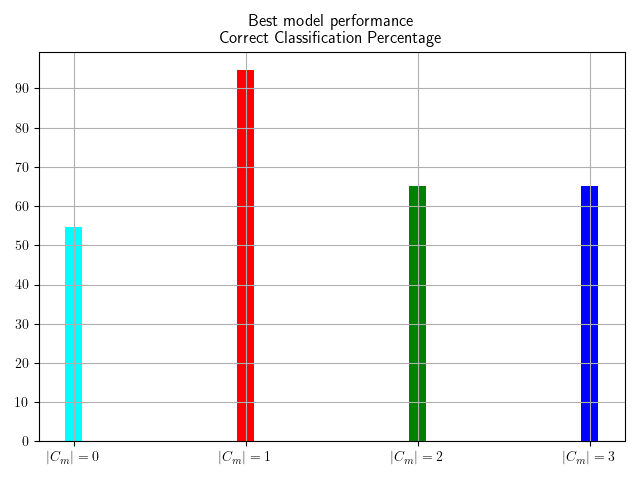

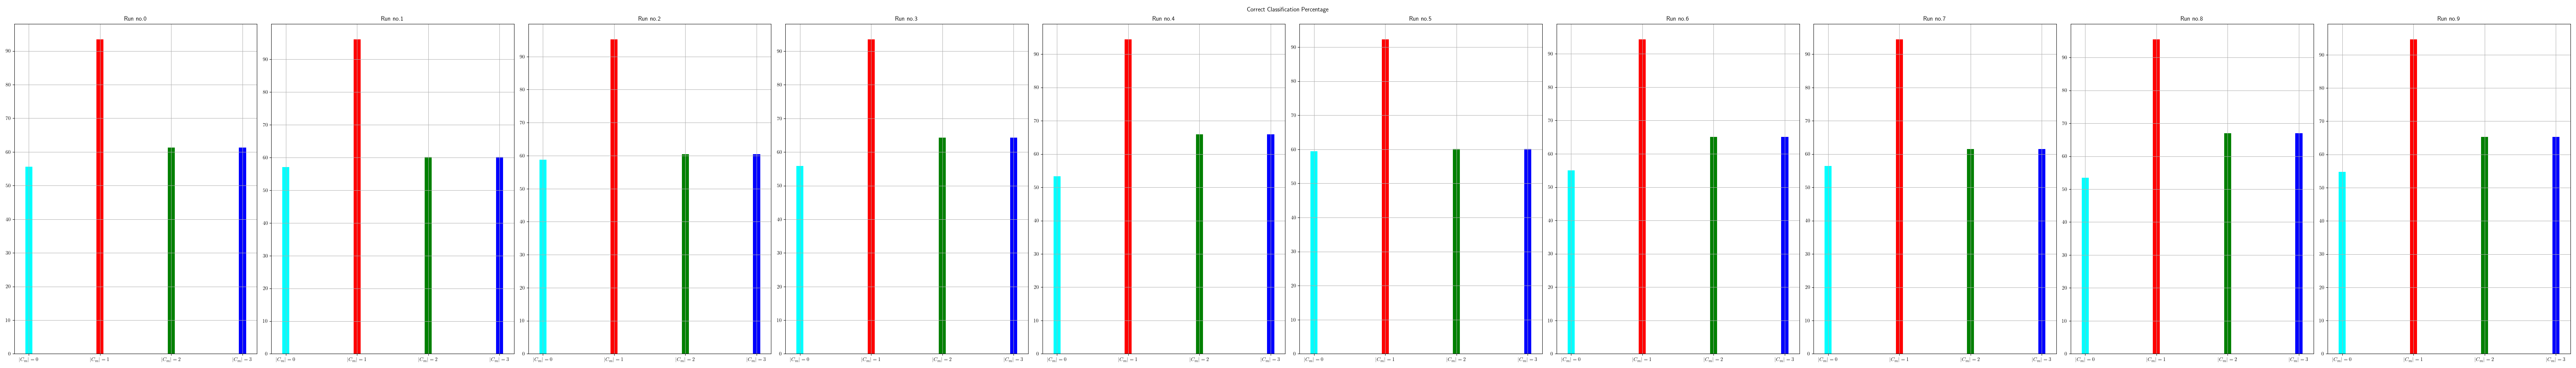

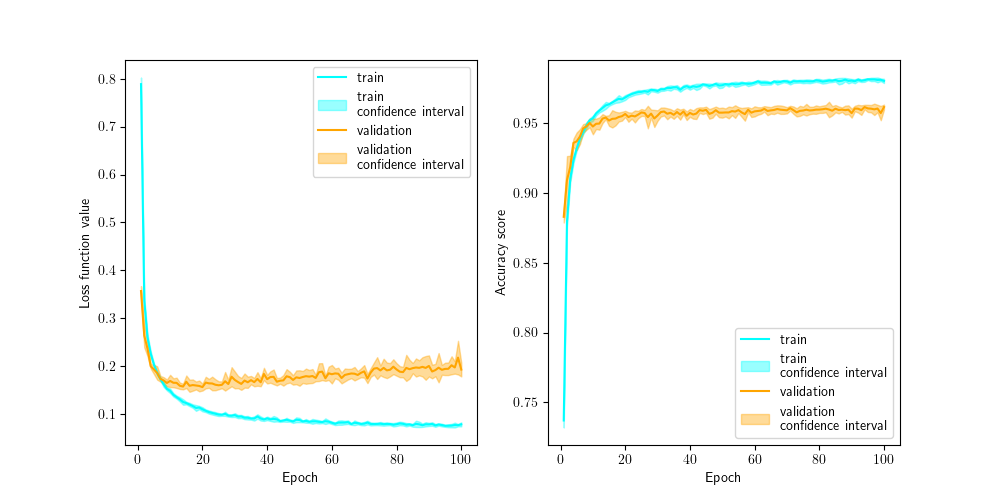

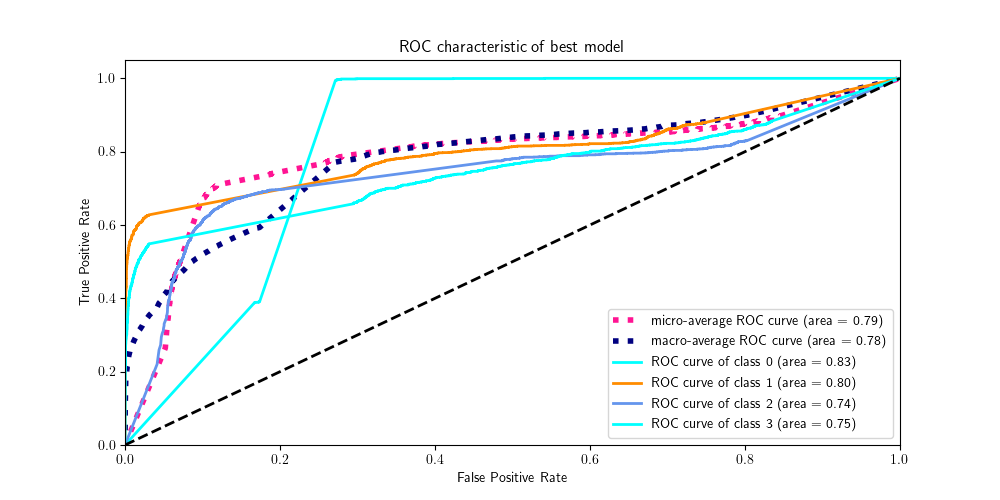

In [141]:
# with plt.xkcd():
aux.printScores(model_A, X_test,  Y_test)
aux.plotHistScores(model_A, X_test, Y_test, title="Best model performance\nCorrect Classification Percentage", tick_labels=labels)
aux.plotTrainingHistory_avg(model_A_hist_tab, alpha=0.4)
aux.plotHistScores_tab(model_A_tab, X_test, Y_test, tick_labels=labels)
ROC_1 = aux.roc_auc(model_A, X_test,  Y_test, title="ROC characteristic of best model")

### Model B

In [125]:
%%time

filepath = "Models/Model_B.ckpt"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
    mode="max",
)

model_B_tab = []
model_B_hist_tab = []

for run in tqdm(range(noRuns), desc="Loading..."):
    model_B = getModelB(
        nFilters,
        kernel_size,
        pool_size,
        dropout_rate,
        inputShape,
        outputWidth,
    )

    model_B_fit = model_B.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=verb, use_multiprocessing=True, callbacks=[checkpoint])

    model_B_tab.append(model_B)
    model_B_hist_tab.append(model_B_fit)

Loading...:   0%|          | 0/10 [00:00<?, ?it/s]2022-04-08 03:03:01.706421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:03:04.101886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.96520

Epoch 00002: val_accuracy did not improve from 0.96520

Epoch 00003: val_accuracy did not improve from 0.96520

Epoch 00004: val_accuracy did not improve from 0.96520

Epoch 00005: val_accuracy did not improve from 0.96520

Epoch 00006: val_accuracy did not improve from 0.96520

Epoch 00007: val_accuracy did not improve from 0.96520

Epoch 00008: val_accuracy did not improve from 0.96520

Epoch 00009: val_accuracy did not improve from 0.96520

Epoch 00010: val_accuracy did not improve from 0.96520

Epoch 00011: val_accuracy did not improve from 0.96520

Epoch 00012: val_accuracy did not improve from 0.96520

Epoch 00013: val_accuracy did not improve from 0.96520

Epoch 00014: val_accuracy did not improve from 0.96520

Epoch 00015: val_accuracy did not improve from 0.96520

Epoch 00016: val_accuracy did not improve from 0.96520

Epoch 00017: val_accuracy did not improve from 0.96520

Epoch 00018: val_accuracy did not improve from 

Loading...:  10%|█         | 1/10 [03:46<33:58, 226.46s/it]


Epoch 00100: val_accuracy did not improve from 0.97721


2022-04-08 03:06:48.078645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:06:50.259442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97721

Epoch 00002: val_accuracy did not improve from 0.97721

Epoch 00003: val_accuracy did not improve from 0.97721

Epoch 00004: val_accuracy did not improve from 0.97721

Epoch 00005: val_accuracy did not improve from 0.97721

Epoch 00006: val_accuracy did not improve from 0.97721

Epoch 00007: val_accuracy did not improve from 0.97721

Epoch 00008: val_accuracy did not improve from 0.97721

Epoch 00009: val_accuracy did not improve from 0.97721

Epoch 00010: val_accuracy did not improve from 0.97721

Epoch 00011: val_accuracy did not improve from 0.97721

Epoch 00012: val_accuracy did not improve from 0.97721

Epoch 00013: val_accuracy did not improve from 0.97721

Epoch 00014: val_accuracy did not improve from 0.97721

Epoch 00015: val_accuracy did not improve from 0.97721

Epoch 00016: val_accuracy did not improve from 0.97721

Epoch 00017: val_accuracy did not improve from 0.97721

Epoch 00018: val_accuracy did not improve from 

Loading...:  20%|██        | 2/10 [07:24<29:33, 221.64s/it]


Epoch 00100: val_accuracy did not improve from 0.97721


2022-04-08 03:10:27.306758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:10:29.517765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97721

Epoch 00002: val_accuracy did not improve from 0.97721

Epoch 00003: val_accuracy did not improve from 0.97721

Epoch 00004: val_accuracy did not improve from 0.97721

Epoch 00005: val_accuracy did not improve from 0.97721

Epoch 00006: val_accuracy did not improve from 0.97721

Epoch 00007: val_accuracy did not improve from 0.97721

Epoch 00008: val_accuracy did not improve from 0.97721

Epoch 00009: val_accuracy did not improve from 0.97721

Epoch 00010: val_accuracy did not improve from 0.97721

Epoch 00011: val_accuracy did not improve from 0.97721

Epoch 00012: val_accuracy did not improve from 0.97721

Epoch 00013: val_accuracy did not improve from 0.97721

Epoch 00014: val_accuracy did not improve from 0.97721

Epoch 00015: val_accuracy did not improve from 0.97721

Epoch 00016: val_accuracy did not improve from 0.97721

Epoch 00017: val_accuracy did not improve from 0.97721

Epoch 00018: val_accuracy did not improve from 

Loading...:  30%|███       | 3/10 [11:06<25:53, 221.87s/it]


Epoch 00100: val_accuracy did not improve from 0.97721


2022-04-08 03:14:08.490036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:14:10.633473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97721

Epoch 00002: val_accuracy did not improve from 0.97721

Epoch 00003: val_accuracy did not improve from 0.97721

Epoch 00004: val_accuracy did not improve from 0.97721

Epoch 00005: val_accuracy did not improve from 0.97721

Epoch 00006: val_accuracy did not improve from 0.97721

Epoch 00007: val_accuracy did not improve from 0.97721

Epoch 00008: val_accuracy did not improve from 0.97721

Epoch 00009: val_accuracy did not improve from 0.97721

Epoch 00010: val_accuracy did not improve from 0.97721

Epoch 00011: val_accuracy did not improve from 0.97721

Epoch 00012: val_accuracy did not improve from 0.97721

Epoch 00013: val_accuracy did not improve from 0.97721

Epoch 00014: val_accuracy did not improve from 0.97721

Epoch 00015: val_accuracy did not improve from 0.97721

Epoch 00016: val_accuracy did not improve from 0.97721

Epoch 00017: val_accuracy did not improve from 0.97721

Epoch 00018: val_accuracy did not improve from 

Loading...:  40%|████      | 4/10 [15:11<23:04, 230.82s/it]


Epoch 00100: val_accuracy did not improve from 0.97814


2022-04-08 03:18:13.018426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:18:15.429873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97814

Epoch 00002: val_accuracy did not improve from 0.97814

Epoch 00003: val_accuracy did not improve from 0.97814

Epoch 00004: val_accuracy did not improve from 0.97814

Epoch 00005: val_accuracy did not improve from 0.97814

Epoch 00006: val_accuracy did not improve from 0.97814

Epoch 00007: val_accuracy did not improve from 0.97814

Epoch 00008: val_accuracy did not improve from 0.97814

Epoch 00009: val_accuracy did not improve from 0.97814

Epoch 00010: val_accuracy did not improve from 0.97814

Epoch 00011: val_accuracy did not improve from 0.97814

Epoch 00012: val_accuracy did not improve from 0.97814

Epoch 00013: val_accuracy did not improve from 0.97814

Epoch 00014: val_accuracy did not improve from 0.97814

Epoch 00015: val_accuracy did not improve from 0.97814

Epoch 00016: val_accuracy did not improve from 0.97814

Epoch 00017: val_accuracy did not improve from 0.97814

Epoch 00018: val_accuracy did not improve from 

Loading...:  50%|█████     | 5/10 [19:13<19:34, 234.93s/it]


Epoch 00100: val_accuracy did not improve from 0.97814


2022-04-08 03:22:15.248036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:22:17.616649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97814

Epoch 00002: val_accuracy did not improve from 0.97814

Epoch 00003: val_accuracy did not improve from 0.97814

Epoch 00004: val_accuracy did not improve from 0.97814

Epoch 00005: val_accuracy did not improve from 0.97814

Epoch 00006: val_accuracy did not improve from 0.97814

Epoch 00007: val_accuracy did not improve from 0.97814

Epoch 00008: val_accuracy did not improve from 0.97814

Epoch 00009: val_accuracy did not improve from 0.97814

Epoch 00010: val_accuracy did not improve from 0.97814

Epoch 00011: val_accuracy did not improve from 0.97814

Epoch 00012: val_accuracy did not improve from 0.97814

Epoch 00013: val_accuracy did not improve from 0.97814

Epoch 00014: val_accuracy did not improve from 0.97814

Epoch 00015: val_accuracy did not improve from 0.97814

Epoch 00016: val_accuracy did not improve from 0.97814

Epoch 00017: val_accuracy did not improve from 0.97814

Epoch 00018: val_accuracy did not improve from 

Loading...:  60%|██████    | 6/10 [23:18<15:53, 238.27s/it]


Epoch 00100: val_accuracy did not improve from 0.97814


2022-04-08 03:26:19.999365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:26:22.376818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97814

Epoch 00002: val_accuracy did not improve from 0.97814

Epoch 00003: val_accuracy did not improve from 0.97814

Epoch 00004: val_accuracy did not improve from 0.97814

Epoch 00005: val_accuracy did not improve from 0.97814

Epoch 00006: val_accuracy did not improve from 0.97814

Epoch 00007: val_accuracy did not improve from 0.97814

Epoch 00008: val_accuracy did not improve from 0.97814

Epoch 00009: val_accuracy did not improve from 0.97814

Epoch 00010: val_accuracy did not improve from 0.97814

Epoch 00011: val_accuracy did not improve from 0.97814

Epoch 00012: val_accuracy did not improve from 0.97814

Epoch 00013: val_accuracy did not improve from 0.97814

Epoch 00014: val_accuracy did not improve from 0.97814

Epoch 00015: val_accuracy did not improve from 0.97814

Epoch 00016: val_accuracy did not improve from 0.97814

Epoch 00017: val_accuracy did not improve from 0.97814

Epoch 00018: val_accuracy did not improve from 

Loading...:  70%|███████   | 7/10 [27:20<11:58, 239.61s/it]


Epoch 00100: val_accuracy did not improve from 0.97814


2022-04-08 03:30:22.368318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:30:24.753788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97814

Epoch 00002: val_accuracy did not improve from 0.97814

Epoch 00003: val_accuracy did not improve from 0.97814

Epoch 00004: val_accuracy did not improve from 0.97814

Epoch 00005: val_accuracy did not improve from 0.97814

Epoch 00006: val_accuracy did not improve from 0.97814

Epoch 00007: val_accuracy did not improve from 0.97814

Epoch 00008: val_accuracy did not improve from 0.97814

Epoch 00009: val_accuracy did not improve from 0.97814

Epoch 00010: val_accuracy did not improve from 0.97814

Epoch 00011: val_accuracy did not improve from 0.97814

Epoch 00012: val_accuracy did not improve from 0.97814

Epoch 00013: val_accuracy did not improve from 0.97814

Epoch 00014: val_accuracy did not improve from 0.97814

Epoch 00015: val_accuracy did not improve from 0.97814

Epoch 00016: val_accuracy did not improve from 0.97814

Epoch 00017: val_accuracy did not improve from 0.97814

Epoch 00018: val_accuracy did not improve from 

Loading...:  80%|████████  | 8/10 [31:24<08:02, 241.01s/it]


Epoch 00100: val_accuracy did not improve from 0.97814


2022-04-08 03:34:26.380099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:34:28.788249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97814

Epoch 00002: val_accuracy did not improve from 0.97814

Epoch 00003: val_accuracy did not improve from 0.97814

Epoch 00004: val_accuracy did not improve from 0.97814

Epoch 00005: val_accuracy did not improve from 0.97814

Epoch 00006: val_accuracy did not improve from 0.97814

Epoch 00007: val_accuracy did not improve from 0.97814

Epoch 00008: val_accuracy did not improve from 0.97814

Epoch 00009: val_accuracy did not improve from 0.97814

Epoch 00010: val_accuracy did not improve from 0.97814

Epoch 00011: val_accuracy did not improve from 0.97814

Epoch 00012: val_accuracy did not improve from 0.97814

Epoch 00013: val_accuracy did not improve from 0.97814

Epoch 00014: val_accuracy did not improve from 0.97814

Epoch 00015: val_accuracy did not improve from 0.97814

Epoch 00016: val_accuracy did not improve from 0.97814

Epoch 00017: val_accuracy did not improve from 0.97814

Epoch 00018: val_accuracy did not improve from 

Loading...:  90%|█████████ | 9/10 [35:13<03:57, 237.17s/it]


Epoch 00100: val_accuracy did not improve from 0.97814


2022-04-08 03:38:15.081753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 03:38:17.257050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.97814

Epoch 00002: val_accuracy did not improve from 0.97814

Epoch 00003: val_accuracy did not improve from 0.97814

Epoch 00004: val_accuracy did not improve from 0.97814

Epoch 00005: val_accuracy did not improve from 0.97814

Epoch 00006: val_accuracy did not improve from 0.97814

Epoch 00007: val_accuracy did not improve from 0.97814

Epoch 00008: val_accuracy did not improve from 0.97814

Epoch 00009: val_accuracy did not improve from 0.97814

Epoch 00010: val_accuracy did not improve from 0.97814

Epoch 00011: val_accuracy did not improve from 0.97814

Epoch 00012: val_accuracy did not improve from 0.97814

Epoch 00013: val_accuracy did not improve from 0.97814

Epoch 00014: val_accuracy did not improve from 0.97814

Epoch 00015: val_accuracy did not improve from 0.97814

Epoch 00016: val_accuracy did not improve from 0.97814

Epoch 00017: val_accuracy did not improve from 0.97814

Epoch 00018: val_accuracy did not improve from 

Loading...: 100%|██████████| 10/10 [38:47<00:00, 232.75s/it]


Epoch 00100: val_accuracy did not improve from 0.97814
CPU times: user 15min 18s, sys: 8min 6s, total: 23min 24s
Wall time: 38min 47s


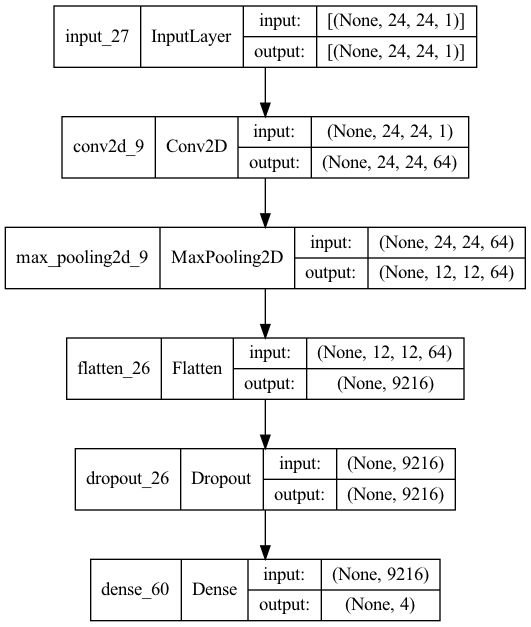

In [126]:
model_B.load_weights(filepath)
# model_B.summary()
tf.keras.utils.plot_model(model_B, 'ML_model_B.png', show_shapes=True)

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      2141
           1       0.98      0.65      0.78      2138
           2       0.71      0.77      0.74      2157
           3       0.96      0.53      0.68      2121

    accuracy                           0.74      8557
   macro avg       0.81      0.74      0.74      8557
weighted avg       0.81      0.74      0.74      8557

[[2136    4    1    0]
 [ 501 1396  222   19]
 [ 436   22 1670   29]
 [ 528    6  471 1116]]
59.31685642876978
97.75910364145658
70.64297800338409
95.87628865979381


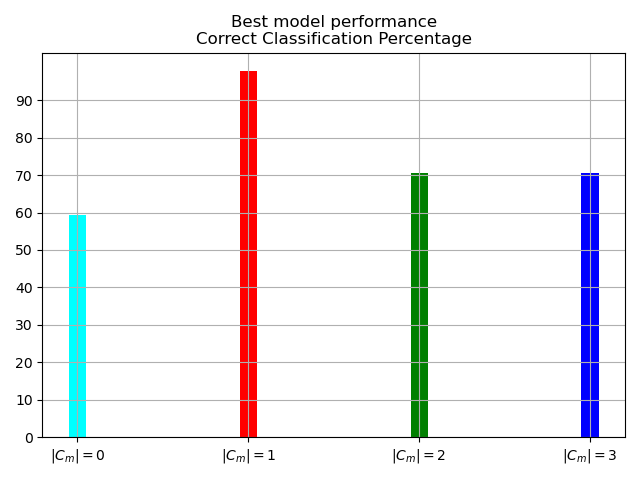

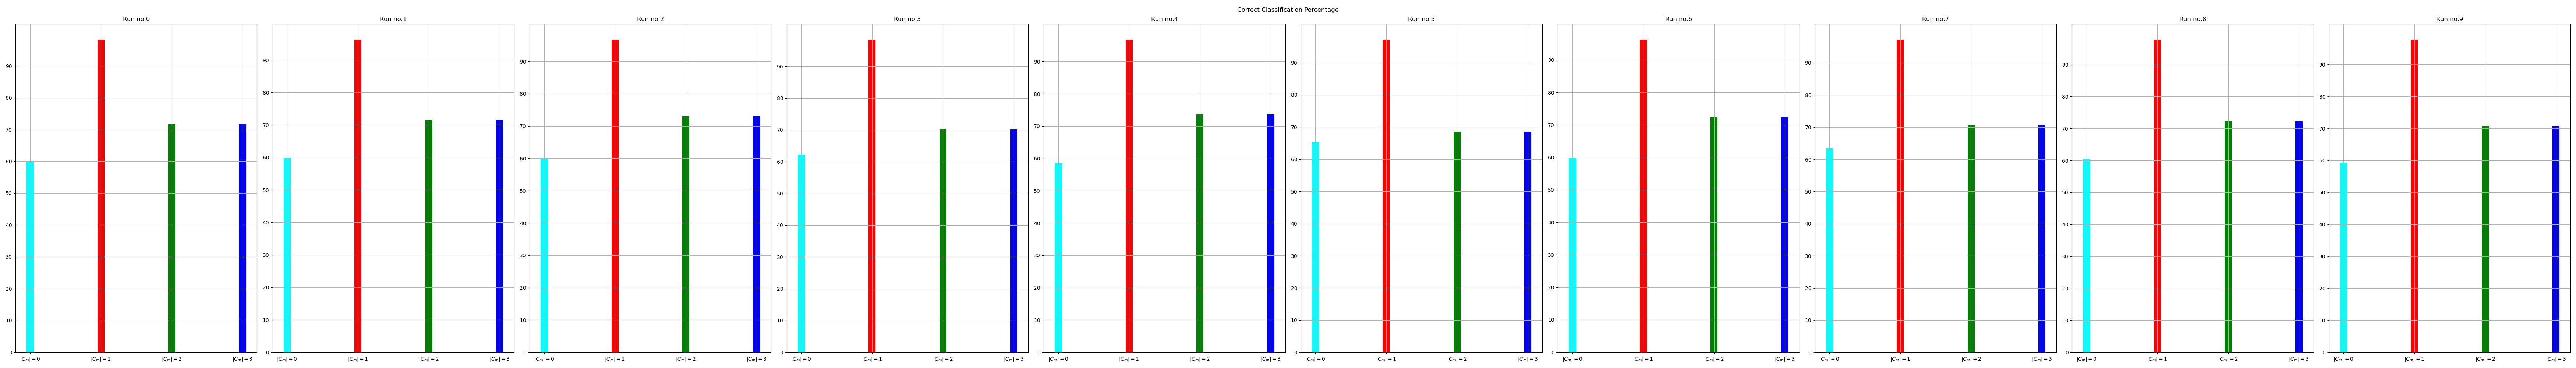

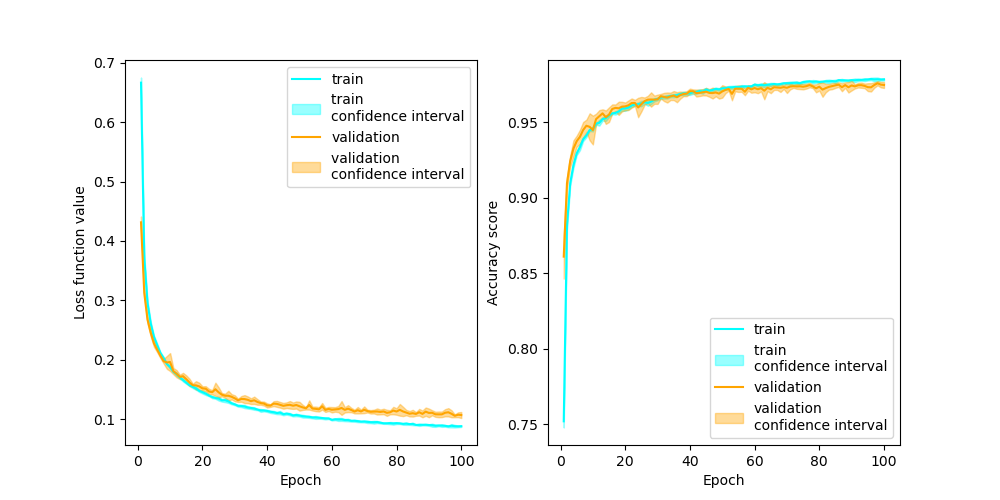

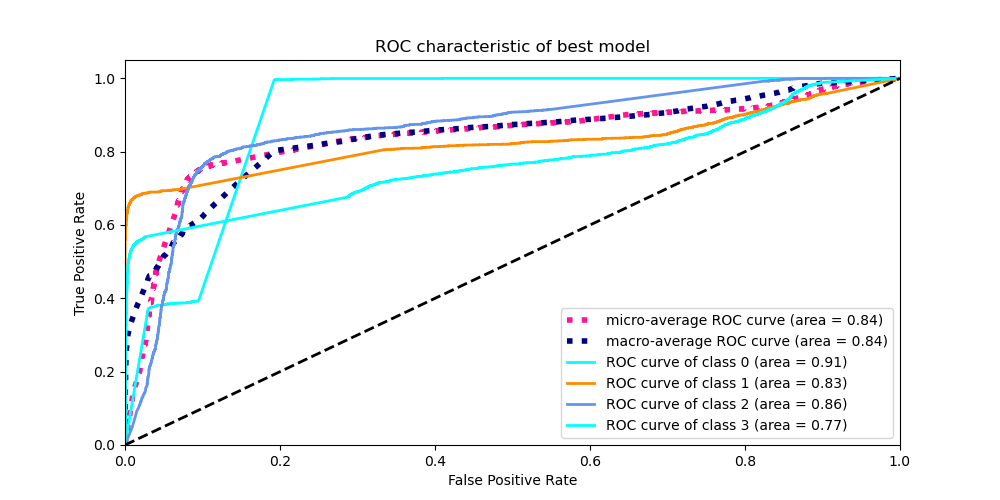

In [142]:
plt.rcdefaults()
# with plt.xkcd():
aux.printScores(model_B, X_test,  Y_test)
aux.plotHistScores(model_B, X_test, Y_test, title="Best model performance\nCorrect Classification Percentage", tick_labels=labels)
aux.plotTrainingHistory_avg(model_B_hist_tab, alpha=0.4)
aux.plotHistScores_tab(model_B_tab, X_test, Y_test, tick_labels=labels)
ROC_1 = aux.roc_auc(model_B, X_test,  Y_test, title="ROC characteristic of best model")

### Model C

In [143]:
%%time

filepath = "Models/Model_C.ckpt"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
    mode="max",
)

model_C_tab = []
model_C_hist_tab = []

for run in tqdm(range(noRuns), desc="Loading..."):
    model_C = getModelC(nFilters,
                        kernel_size,
                        pool_size,
                        nHiddenLayers,
                        dropout_rate,
                        inputShape,
                        outputWidth,
                        )

    model_C_fit = model_C.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=verb, use_multiprocessing=True, callbacks=[checkpoint])

    model_C_tab.append(model_C)
    model_C_hist_tab.append(model_C_fit)

Loading...:   0%|          | 0/10 [00:00<?, ?it/s]2022-04-08 10:01:10.549939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:01:12.961359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy improved from -inf to 0.81647, saving model to Models/Model_A.ckpt

Epoch 00002: val_accuracy improved from 0.81647 to 0.88206, saving model to Models/Model_A.ckpt

Epoch 00003: val_accuracy improved from 0.88206 to 0.91424, saving model to Models/Model_A.ckpt

Epoch 00004: val_accuracy improved from 0.91424 to 0.92440, saving model to Models/Model_A.ckpt

Epoch 00005: val_accuracy improved from 0.92440 to 0.93734, saving model to Models/Model_A.ckpt

Epoch 00006: val_accuracy improved from 0.93734 to 0.94257, saving model to Models/Model_A.ckpt

Epoch 00007: val_accuracy did not improve from 0.94257

Epoch 00008: val_accuracy improved from 0.94257 to 0.94950, saving model to Models/Model_A.ckpt

Epoch 00009: val_accuracy did not improve from 0.94950

Epoch 00010: val_accuracy improved from 0.94950 to 0.95012, saving model to Models/Model_A.ckpt

Epoch 00011: val_accuracy improved from 0.95012 to 0.95443, saving model to Models/Model_A.ckpt

Epoch 00012: val_

Loading...:  10%|█         | 1/10 [03:29<31:27, 209.77s/it]


Epoch 00100: val_accuracy did not improve from 0.98229


2022-04-08 10:04:40.299612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:04:42.470081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98229

Epoch 00002: val_accuracy did not improve from 0.98229

Epoch 00003: val_accuracy did not improve from 0.98229

Epoch 00004: val_accuracy did not improve from 0.98229

Epoch 00005: val_accuracy did not improve from 0.98229

Epoch 00006: val_accuracy did not improve from 0.98229

Epoch 00007: val_accuracy did not improve from 0.98229

Epoch 00008: val_accuracy did not improve from 0.98229

Epoch 00009: val_accuracy did not improve from 0.98229

Epoch 00010: val_accuracy did not improve from 0.98229

Epoch 00011: val_accuracy did not improve from 0.98229

Epoch 00012: val_accuracy did not improve from 0.98229

Epoch 00013: val_accuracy did not improve from 0.98229

Epoch 00014: val_accuracy did not improve from 0.98229

Epoch 00015: val_accuracy did not improve from 0.98229

Epoch 00016: val_accuracy did not improve from 0.98229

Epoch 00017: val_accuracy did not improve from 0.98229

Epoch 00018: val_accuracy did not improve from 

Loading...:  20%|██        | 2/10 [07:02<28:14, 211.80s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:08:13.525027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:08:15.690267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  30%|███       | 3/10 [10:37<24:52, 213.15s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:11:48.294967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:11:50.620129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  40%|████      | 4/10 [14:50<22:52, 228.71s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:16:02.751343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:16:05.136683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  50%|█████     | 5/10 [19:09<19:59, 239.85s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:20:20.445419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:20:22.930254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  60%|██████    | 6/10 [23:01<15:48, 237.04s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:24:12.037944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:24:14.368885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  70%|███████   | 7/10 [26:47<11:40, 233.57s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:27:58.459905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:28:00.724692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  80%|████████  | 8/10 [30:33<07:42, 231.09s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:31:44.263956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:31:46.599269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...:  90%|█████████ | 9/10 [34:31<03:53, 233.21s/it]


Epoch 00100: val_accuracy did not improve from 0.98276


2022-04-08 10:35:42.096994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 10:35:44.444909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.98276

Epoch 00002: val_accuracy did not improve from 0.98276

Epoch 00003: val_accuracy did not improve from 0.98276

Epoch 00004: val_accuracy did not improve from 0.98276

Epoch 00005: val_accuracy did not improve from 0.98276

Epoch 00006: val_accuracy did not improve from 0.98276

Epoch 00007: val_accuracy did not improve from 0.98276

Epoch 00008: val_accuracy did not improve from 0.98276

Epoch 00009: val_accuracy did not improve from 0.98276

Epoch 00010: val_accuracy did not improve from 0.98276

Epoch 00011: val_accuracy did not improve from 0.98276

Epoch 00012: val_accuracy did not improve from 0.98276

Epoch 00013: val_accuracy did not improve from 0.98276

Epoch 00014: val_accuracy did not improve from 0.98276

Epoch 00015: val_accuracy did not improve from 0.98276

Epoch 00016: val_accuracy did not improve from 0.98276

Epoch 00017: val_accuracy did not improve from 0.98276

Epoch 00018: val_accuracy did not improve from 

Loading...: 100%|██████████| 10/10 [38:31<00:00, 231.14s/it]


Epoch 00100: val_accuracy did not improve from 0.98276
CPU times: user 17min 48s, sys: 7min 55s, total: 25min 44s
Wall time: 38min 31s


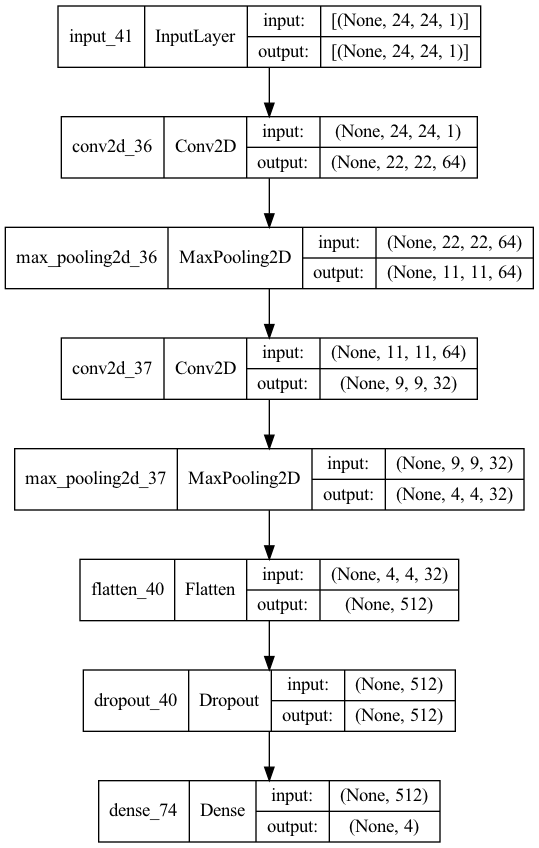

In [146]:
model_C.load_weights(filepath)
# model_C.summary()
tf.keras.utils.plot_model(model_C, 'ML_model_C.png', show_shapes=True)

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      2141
           1       0.98      0.68      0.80      2138
           2       0.63      0.90      0.74      2157
           3       0.95      0.56      0.70      2121

    accuracy                           0.78      8557
   macro avg       0.83      0.78      0.77      8557
weighted avg       0.83      0.78      0.77      8557

[[2089    1   48    3]
 [ 268 1451  391   28]
 [ 166   18 1936   37]
 [ 234    9  697 1181]]
75.77076532462821
98.10682893847193
63.020833333333336
94.55564451561249


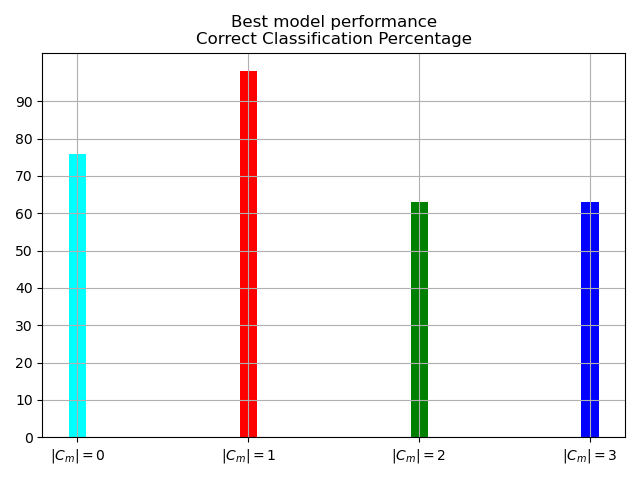

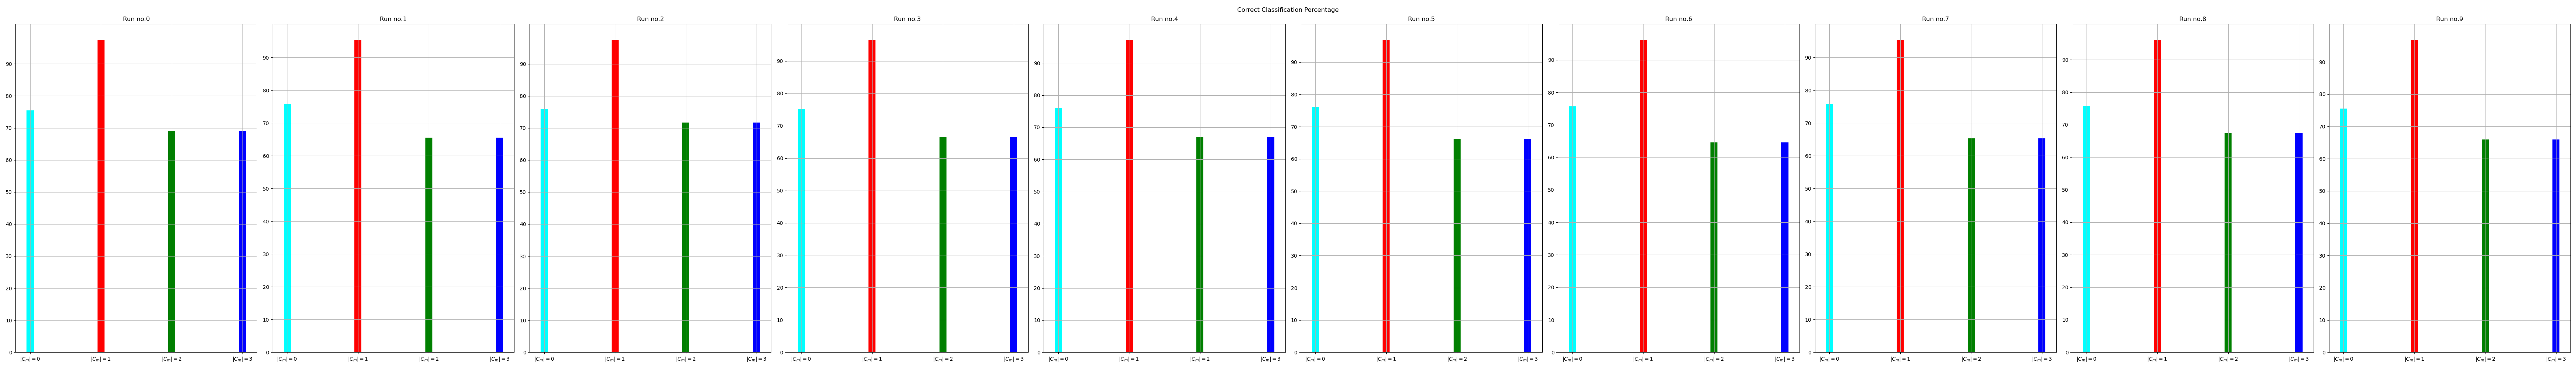

/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_aux['class'] = [1 if y == c else 0 for y in y_test]
/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_aux['class'] = [1 if y == c else 0 for y in y_test]
/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_aux['class'] = [1 if y == c else 0 for y in y_test]
/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:130: FutureWarning: elementwise comparison f

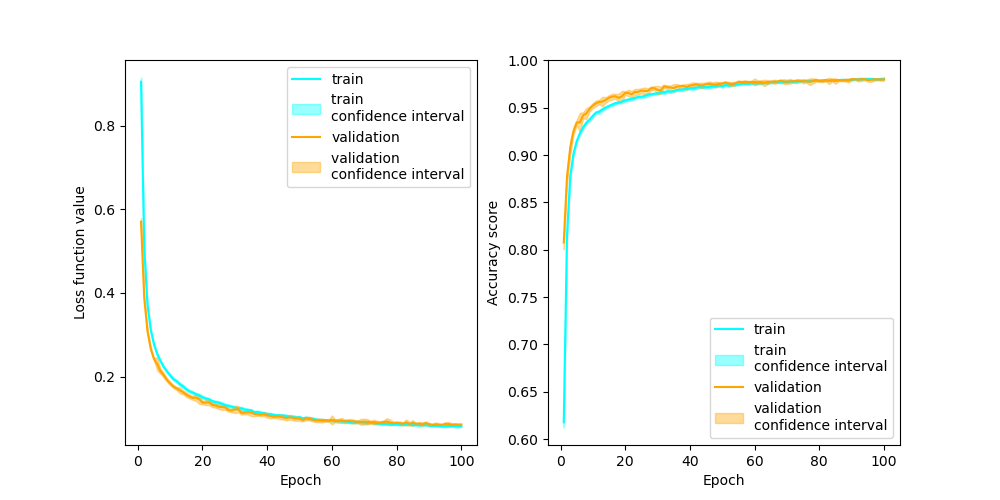

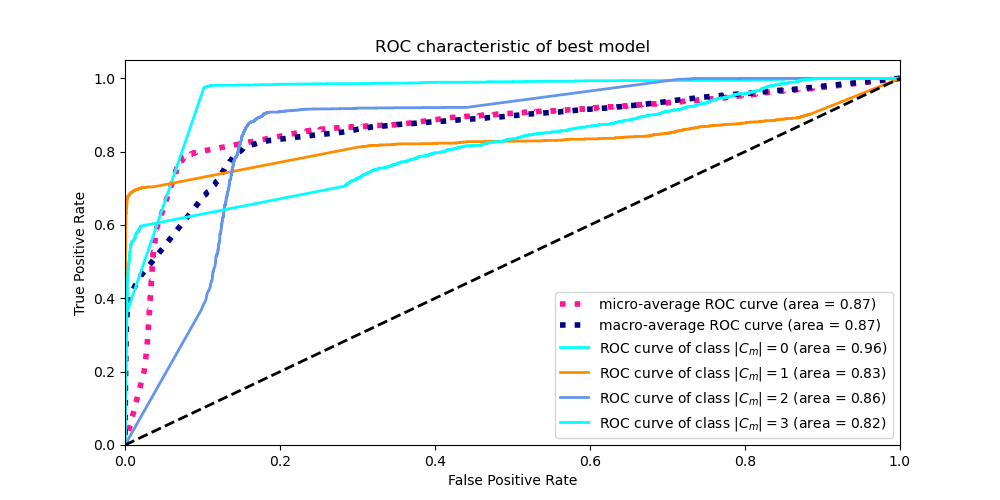

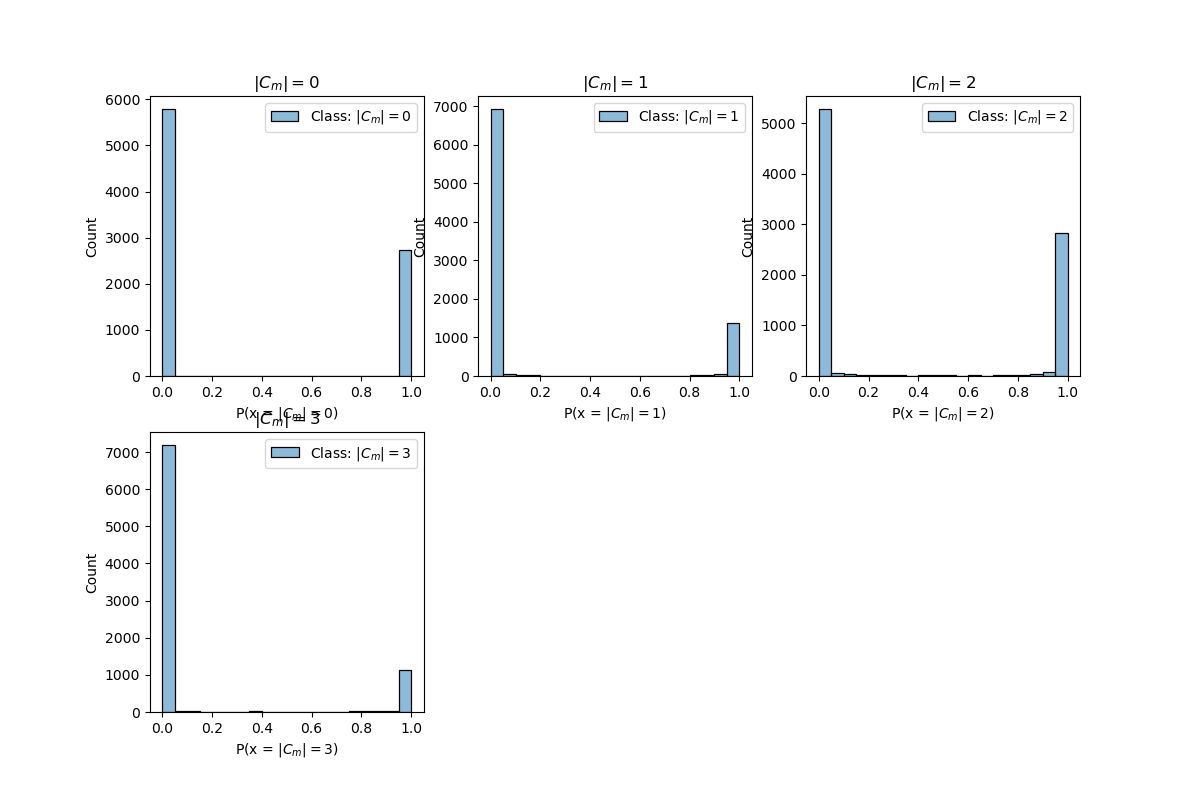

In [154]:
# with plt.xkcd():
aux.printScores(model_C, X_test,  Y_test)
aux.plotHistScores(model_C, X_test, Y_test, title="Best model performance\nCorrect Classification Percentage", tick_labels=labels)
aux.plotTrainingHistory_avg(model_C_hist_tab, alpha=0.4)
aux.plotHistScores_tab(model_C_tab, X_test, Y_test, tick_labels=labels)
ROC_1 = aux.roc_auc(model_C, X_test,  Y_test, title="ROC characteristic of best model", labels=labels)

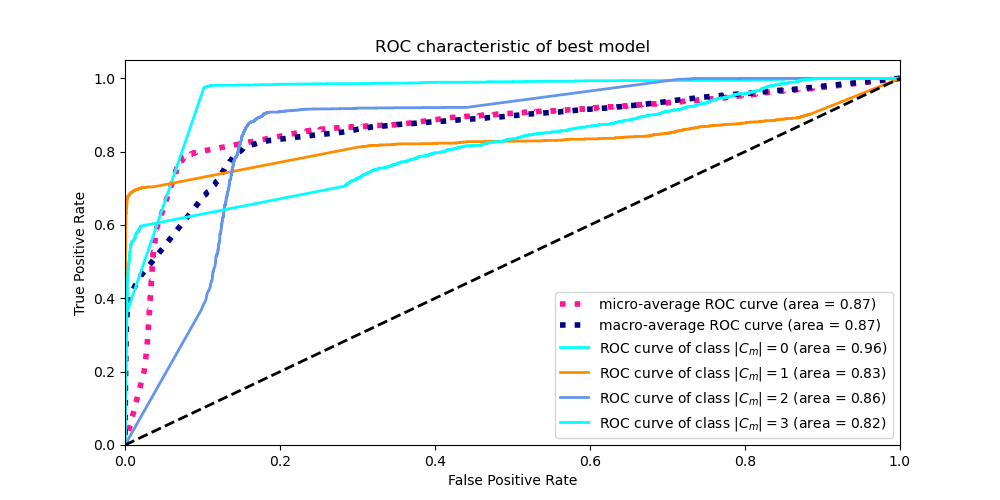

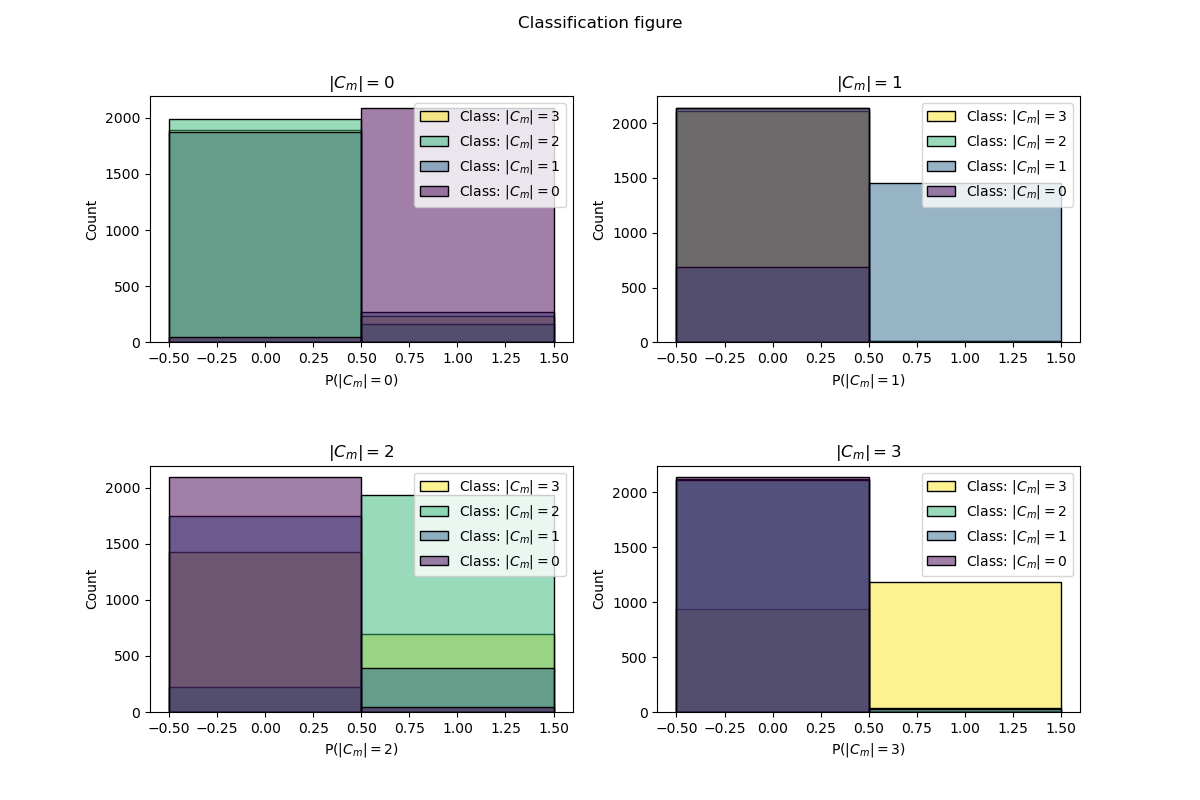

In [194]:
ROC_1 = aux.roc_auc(model_C, X_test,  Y_test, title="ROC characteristic of best model", labels=labels)

# Code linting

In [102]:
!black Raw_Data

All done! ✨ 🍰 ✨
11 files left unchanged.


In [103]:
!black auxiliary_funcs.py

reformatted auxiliary_funcs.py

All done! ✨ 🍰 ✨
1 file reformatted.
